In [ ]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
import numpy as np

import random

In [ ]:
class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the network. Default: 50

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        #plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=False,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        #plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

In [ ]:
def run_simulation(alpha=0.03, beta=0.3, gamma=4):
    sim = SocialDynamicsSimulation(alpha=alpha, beta=beta, gamma=gamma)
    sim.initialize()
    #fig = plt.figure(figsize=(12, 9))
    #gs = gridspec.GridSpec(nrows=3, ncols=4)
    #ax0 = fig.add_subplot(gs[0, 0])
    #sim.observe()
    #for plot_index in range(11):
    #    for i in range(2000):
    #        sim.update()
    #    fig.add_subplot(gs[(plot_index+1)//4, (plot_index+1)%4])
    #    sim.observe()

    for i in range(11):
        for j in range(2000):
            sim.update()

    sim.observe()

    plt.suptitle(rf'$\alpha={alpha}, \beta={beta}, \gamma={gamma}$')
    # plt.tight_layout()
    plt.show()

In [ ]:
def plot_phase_diagram(alpha=0.03, beta=0.3, gamma=4):
    # Plot vector field
    opinion = np.linspace(0.01, 0.99, 11)  # the difference in opinion, |o_i - o_j|
    weight = np.linspace(0.01, 0.99, 11)   # the edge weight, w_ij
    ow_grid = np.meshgrid(opinion, weight)
    delta_o_grid = -2*alpha * ow_grid[1] * ow_grid[0]
    delta_w_grid = beta * ow_grid[1] * (1-ow_grid[1]) * (1 - gamma * ow_grid[0])

    colors = np.empty(ow_grid[0].shape)

    for index, (opinion, weight) in enumerate(zip(ow_grid[0].flat, ow_grid[1].flat)):
        ow = [[opinion, 0.0, weight]]
        for i in range(100):
            delta_o = alpha * ow[-1][2] * (ow[-1][1] - ow[-1][0])
            delta_w = (
                beta * ow[-1][2] * (1-ow[-1][2]) *
                (1-gamma*abs(ow[-1][1] - ow[-1][0])))
            new_weight = ow[-1][2] + delta_w
            if new_weight < 0.05:
                new_weight = 0
            ow.append([ow[-1][0] + delta_o, ow[-1][1] - delta_o, new_weight])
            if new_weight == 0:
                break
        colors.flat[index] = 0.15 if ow[-1][2] == 0 else 0.75

    plt.figure(figsize=(6, 6))
    plt.title(rf'$\alpha={alpha}, \beta={beta}, \gamma={gamma}$')

    plt.streamplot(ow_grid[0], ow_grid[1], delta_o_grid, delta_w_grid, color=colors, cmap=plt.cm.bwr
)
    plt.plot([0, 1], [0.05, 0.05], 'k--')

    plt.xlabel('opinion difference')
    plt.ylabel('weight')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

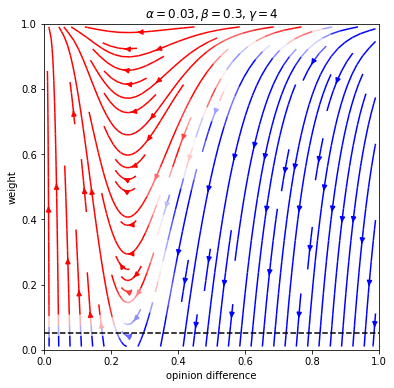

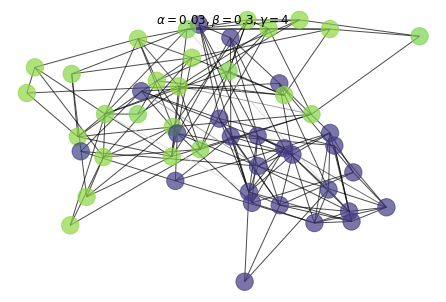

******************************************************


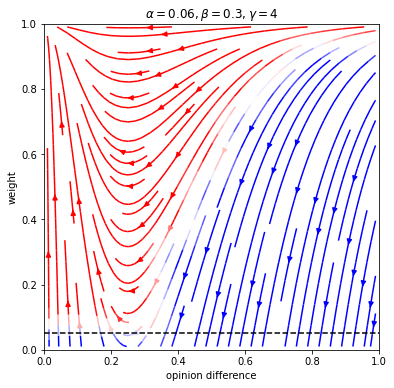

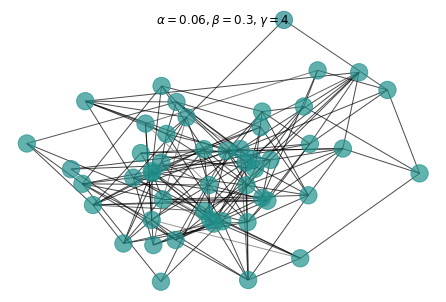

******************************************************


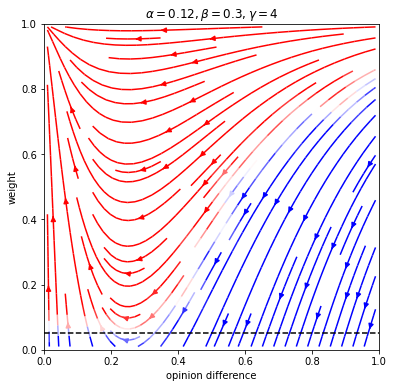

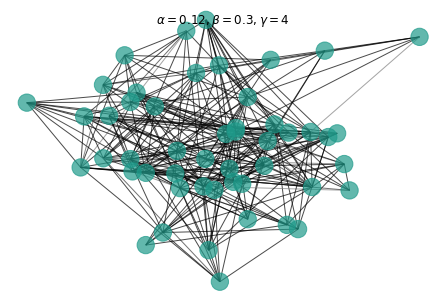

******************************************************


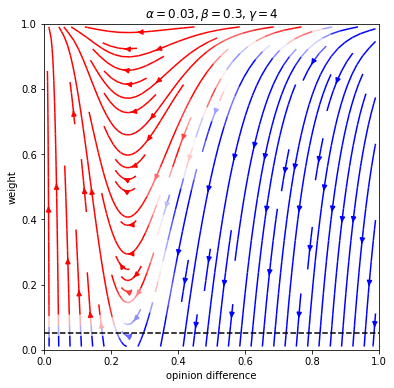

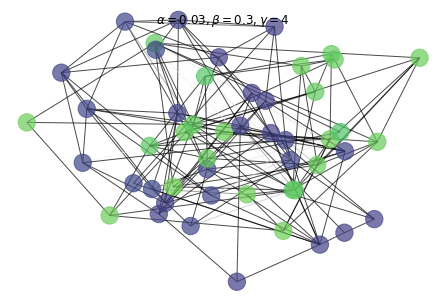

******************************************************


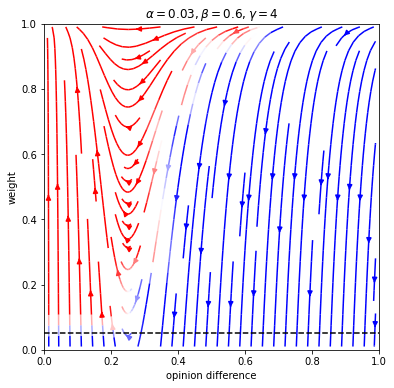

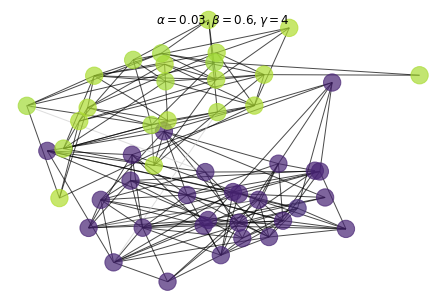

******************************************************


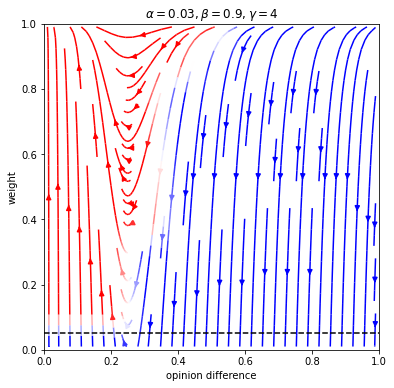

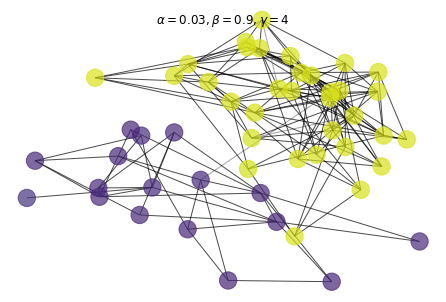

******************************************************


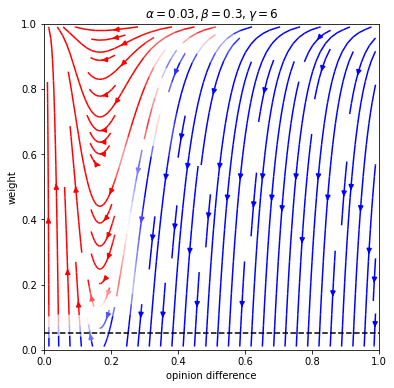

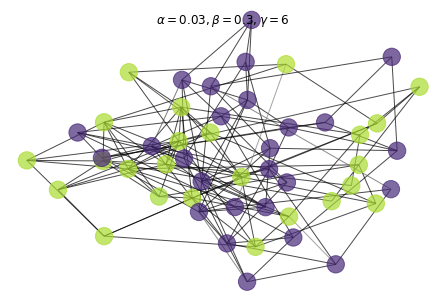

******************************************************


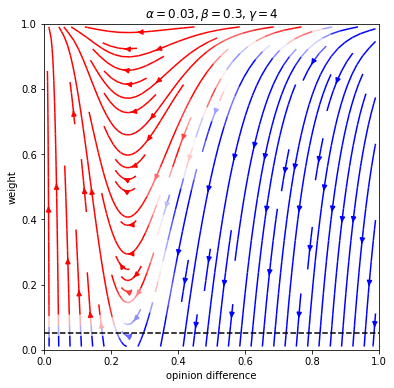

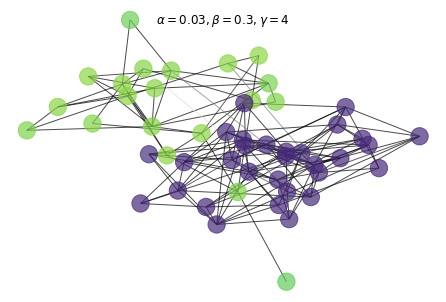

******************************************************


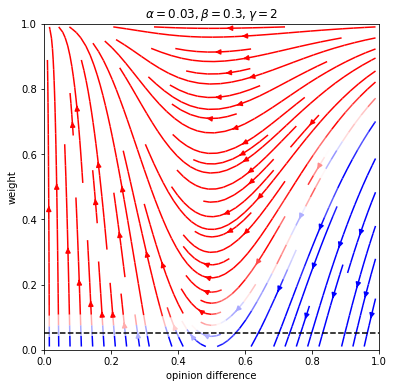

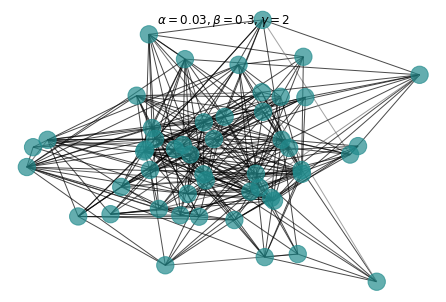

******************************************************


In [ ]:
alphas = [0.03,0.06,0.12]
betas = [0.3,0.6,0.9]
gammas = [6,4,2]

params = {"alpha":alphas, "beta":betas, "gamma":gammas}

for key in params:
    for i in params[key]:
        if key == "alpha":
            plot_phase_diagram(alpha=i)
            run_simulation(alpha=i)
            
        elif key == "beta":
            plot_phase_diagram(beta=i)
            run_simulation(beta=i)

        elif key == "gamma":
            plot_phase_diagram(gamma=i)
            run_simulation(gamma=i)

        print("******************************************************")